In [20]:
import pandas as pd
import numpy as np

In [21]:
# Load data from the file
df = pd.read_csv("../data/icml_face_data.csv")

In [22]:
# Get know more about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [23]:
df.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [24]:
df['emotion'].unique() # probably there will be a need to map numbers to emotions

array([0, 2, 4, 6, 3, 5, 1])

In [25]:
# Create dictionary num -> emotion
# source: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data
numToEmotion = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [26]:
df[' Usage'].unique() # dataset is alredy grouped into train and test subset

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [27]:
type(df[' pixels'].iloc[0])

str

In [28]:
# Standarize column names
df.columns = ['emotion', 'usage', 'pixels']

In [29]:
# Images screening
# Create functinon to show image from pixels
def display_image(row: pd.core.series.Series) -> None:
    pixels = row['pixels']
    emotionNumber = row['emotion']
    
    pixels_array = np.array(pixels.split(" "), 'uint8') / 255
    pixels_reshaped = pixels_array.reshape(48, 48)
    
    plt.imshow(pixels_reshaped, cmap="gray")
    plt.title(numToEmotion[emotionNumber])
    plt.show()

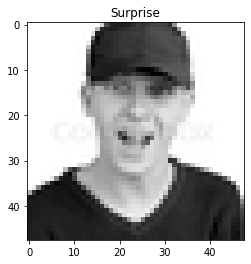

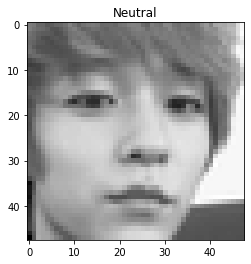

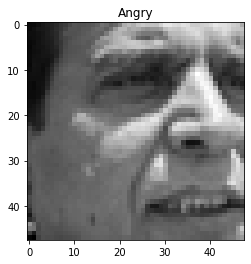

In [30]:
# Display a couple of sample images
display_image(df.iloc[55])
display_image(df.iloc[13])
display_image(df.iloc[23])

In [31]:
# Map pixels as str into numpy array format in the dataset
def map_str_to_array(pixels: str) -> np.array:
    pixels_array = np.array(pixels.split(" "), 'float32') / 255
    pixels_reshaped = np.reshape(pixels_array, (48, 48))
    return pixels_reshaped

df['pixels'] = df['pixels'].map(lambda pixels: map_str_to_array(pixels))

In [32]:
df.to_pickle('../data/icml_face_data_procc.csv')